In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


df_cust = pd.read_csv("customers.csv")
df_trans = pd.read_csv("transactions.csv")
df_cs = pd.read_csv("credit_profiles.csv")

In [2]:
print(df_cust.shape)
df_cust.head()

(1000, 8)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
print(df_trans.shape)
df_trans.head()

(128037, 7)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [4]:
print(df_cs.shape)
df_cs.head()

(1004, 6)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [5]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [6]:
df_cust.isnull().sum()

,0
cust_id,0
name,0
gender,0
age,0
location,0
occupation,0
annual_income,50
marital_status,0


In [7]:
df_cust[df_cust.annual_income.isna()].head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married


In [8]:
df_cust[df_cust.occupation=="Artist"].annual_income.median()

45794.0

In [9]:
df_cust[df_cust.occupation=="Data Scientist"].annual_income.median()

135759.0

### **We take median of every occupation to replace NaN values**

In [10]:
occupation_wise_inc_median=df_cust.groupby("occupation")["annual_income"].median()
occupation_wise_inc_median

,annual_income
occupation,
Accountant,65265.0
Artist,45794.0
Business Owner,261191.5
Consultant,58017.0
Data Scientist,135759.0
Freelancer,46759.0
Fullstack Developer,76774.0


In [11]:
occupation_wise_inc_median["Artist"]

45794.0

In [12]:
def get_median_val(row):
    if pd.isnull(row["annual_income"]):
        return occupation_wise_inc_median[row["occupation"]]
    else:
        return row["annual_income"]

In [13]:
get_median_val({"cust _id":3245,"occupation":"Artist","annual_income":None})

45794.0

In [14]:
df_cust["annual_income"]=df_cust.apply(get_median_val,axis=1)
#df_cust['annual_income'] = df_cust['annual_income'].fillna(occupation_wise_inc_median)
#df_cust["annual_income"]=df_cust.apply(lambda row: occupation_wise_inc_median[row['occupation']] if pd.isnull(row["annual_income"]) else row["annual_income"], axis=1)

In [15]:
df_cust.isna().sum()

,0
cust_id,0
name,0
gender,0
age,0
location,0
occupation,0
annual_income,0
marital_status,0


In [16]:
df_cust.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


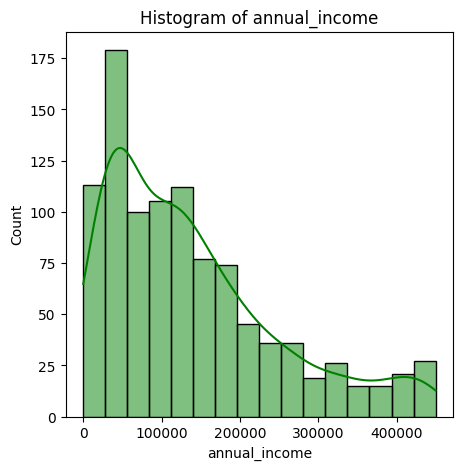

In [17]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust['annual_income'],kde=True,color='green',label='Data')
plt.title('Histogram of annual_income')
plt.show()

In [18]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


### **After replacing NaN there is still some outliers and errors are present in annual_income, we again replace them with median**

In [19]:
df_cust[df_cust.annual_income<100] #data Error in annual_income

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [20]:
occupation_wise_inc_median

,annual_income
occupation,
Accountant,65265.0
Artist,45794.0
Business Owner,261191.5
Consultant,58017.0
Data Scientist,135759.0
Freelancer,46759.0
Fullstack Developer,76774.0


In [21]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [22]:
df_cust.at[4,"annual_income"]

39406.0

In [23]:
for index,row in df_cust.iterrows():
    if row["annual_income"]<100:
        df_cust.at[index,"annual_income"]=occupation_wise_inc_median[row["occupation"]]

In [24]:
df_cust[df_cust.annual_income<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [25]:
df_cust.iloc[[31,316]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,261191.5,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,58017.0,Married


### **After data cleaning we tried to visualize it by using mean of annual_income**

In [26]:
avg_income_per_occupation=df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

,annual_income
occupation,
Accountant,64123.562500
Artist,45309.236842
Business Owner,268447.368512
Consultant,60703.154639
Data Scientist,137021.266304
Freelancer,76327.508772
Fullstack Developer,78727.972973


In [27]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [28]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

<ipython-input-29-571582af397c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values, palette="tab10")


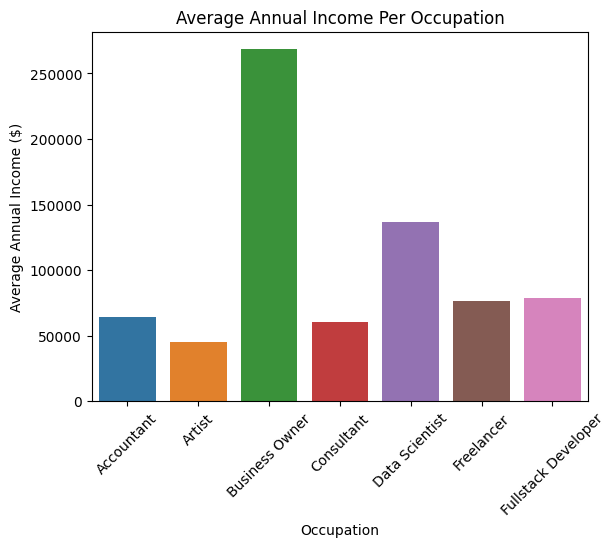

In [29]:
sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values, palette="tab10")
plt.xticks(rotation=45)
plt.title("Average Annual Income Per Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Annual Income ($)")
plt.show()

<ipython-input-30-2c7a10bd0edb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values, palette="tab10")


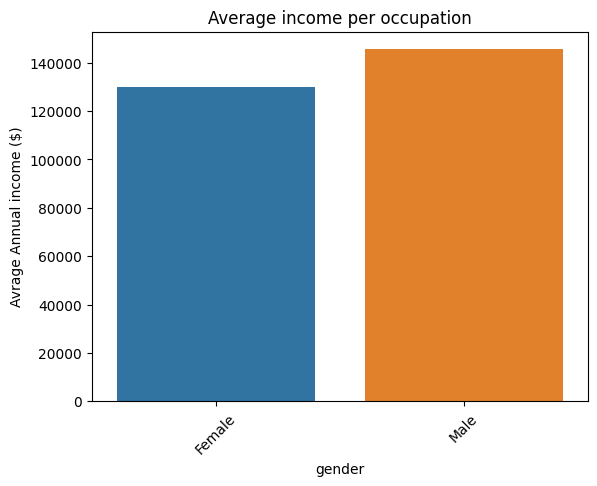

<ipython-input-30-2c7a10bd0edb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values, palette="tab10")


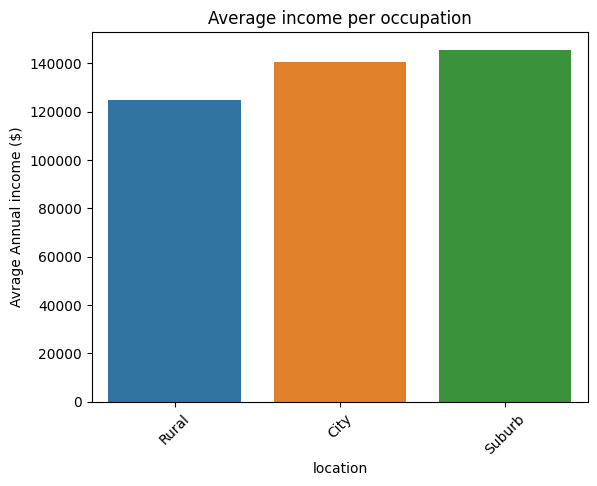

<ipython-input-30-2c7a10bd0edb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values, palette="tab10")


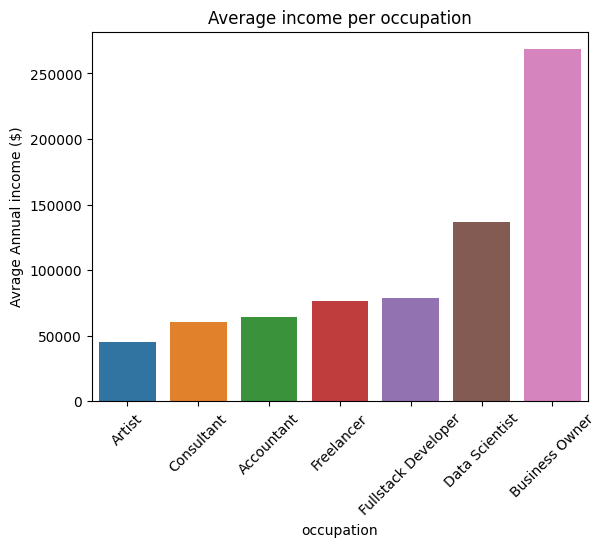

<ipython-input-30-2c7a10bd0edb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values, palette="tab10")


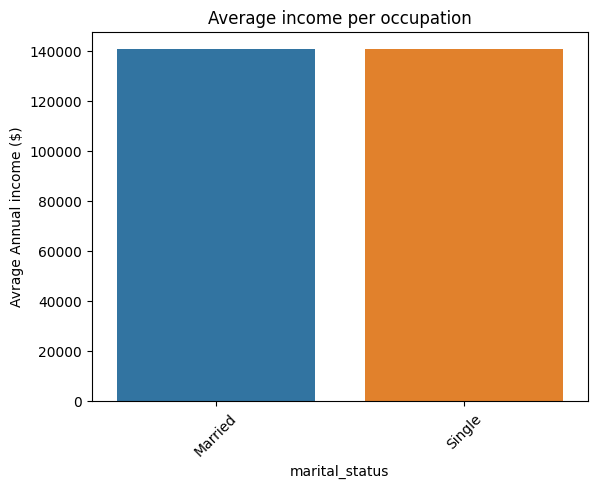

In [30]:
categorical_columns=["gender","location","occupation","marital_status"]

for col in categorical_columns:
      avg_income_per_occupation=df_cust.groupby(col)["annual_income"].mean().sort_values()
      sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values, palette="tab10")
      plt.title("Average income per occupation")
      plt.xticks(rotation=45)
      plt.xlabel(col)
      plt.ylabel("Avrage Annual income ($)")
      plt.show()

### **Exercise : Treating Outliers in Age column**
Treating/Treatment means removing them and replace them

In [31]:
df_cust.isnull().sum()

,0
cust_id,0
name,0
gender,0
age,0
location,0
occupation,0
annual_income,0
marital_status,0


In [32]:
df_cust["age"].describe()

,age
count,1000.000000
mean,36.405000
std,15.666155
min,1.000000
25%,26.000000
50%,32.000000
75%,46.000000
max,135.000000


In [33]:
age_outliers=df_cust[(df_cust.age<15)|(df_cust.age>80)]
age_outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [34]:
avg_age_per_occupation=df_cust.groupby("occupation")["age"].median()
avg_age_per_occupation

,age
occupation,
Accountant,31.5
Artist,26.0
Business Owner,51.0
Consultant,46.0
Data Scientist,32.0
Freelancer,24.0
Fullstack Developer,27.5


In [35]:
for index,row in age_outliers.iterrows():
    df_cust.at[index,"age"]=avg_age_per_occupation[row["occupation"]]

<ipython-input-35-c8603f374136>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index,"age"]=avg_age_per_occupation[row["occupation"]]


In [36]:
df_cust[(df_cust.age<15)|(df_cust.age>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [37]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.541500,140483.548500
std,288.819436,12.276634,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


### **Data Visualization: Age, Gender, Location**

In [38]:
bins = [18, 25, 48, 65]
labels = ['18-25', '26-48', '49-65']

# Create a new column 'age_group' using pd.cut
df_cust['age_group'] = pd.cut(df_cust['age'], bins=bins, labels=labels)

In [39]:
df_cust.head(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25


In [40]:
age_group_counts=df_cust.age_group.value_counts(normalize=True)*100
age_group_counts

,proportion
age_group,
26-48,57.563452
18-25,23.451777
49-65,18.984772


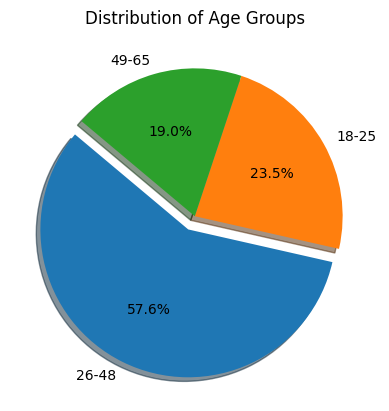

In [41]:
plt.pie(
        age_group_counts,
        labels=age_group_counts.index,
        autopct='%1.1f%%',
        shadow=True,
        explode=(0.1,0,0),
        startangle=140
)
plt.title("Distribution of Age Groups")
plt.show()

In [42]:
df_cust.location.value_counts()

,count
location,
City,683
Suburb,232
Rural,85


In [43]:
df_cust.gender.value_counts()

,count
gender,
Male,674
Female,326


In [44]:
customer_location_gender=df_cust.groupby(["location","gender"]).size().unstack()
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


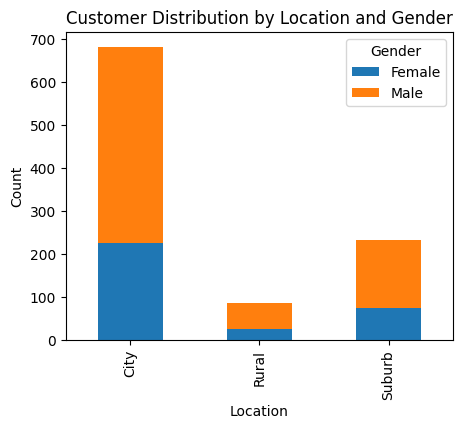

In [45]:
customer_location_gender.plot(kind="bar",stacked=True,figsize=(5,4))
plt.title("Customer Distribution by Location and Gender")
plt.legend(title="Gender")
plt.xlabel("Location")
plt.ylabel("Count")
plt.show()


## **Data Cleaning: Credit Score Table**


In [46]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [47]:
df_cs.shape

(1004, 6)

In [48]:
df_cust.shape

(1000, 9)

In [49]:
df_cs['cust_id'].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [50]:
df_cs['cust_id'].nunique()

1000

In [51]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


We drop duplicates here


In [52]:
df_cs_clean_1=df_cs.drop_duplicates(subset="cust_id",keep="last") #keep = last means we have to keep last or 2nd record and delete first for E.g cust_id of 517 have two records first is invalid with NaN and 2nd is valid with data
df_cs_clean_1.shape

(1000, 6)

In [53]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


Checking null values

In [54]:
df_cs_clean_1.isnull().sum()

,0
cust_id,0
credit_score,0
credit_utilisation,0
outstanding_debt,0
credit_inquiries_last_6_months,0
credit_limit,65


In [55]:
df_cs_clean_1[df_cs_clean_1.credit_limit.isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


We try to find relationship between credit score and credit_limit


In [56]:
df_cs_clean_1.credit_limit.value_counts()

,count
credit_limit,
500.0,229
60000.0,186
40000.0,137
1500.0,100
1000.0,90
750.0,76
1250.0,75
20000.0,42


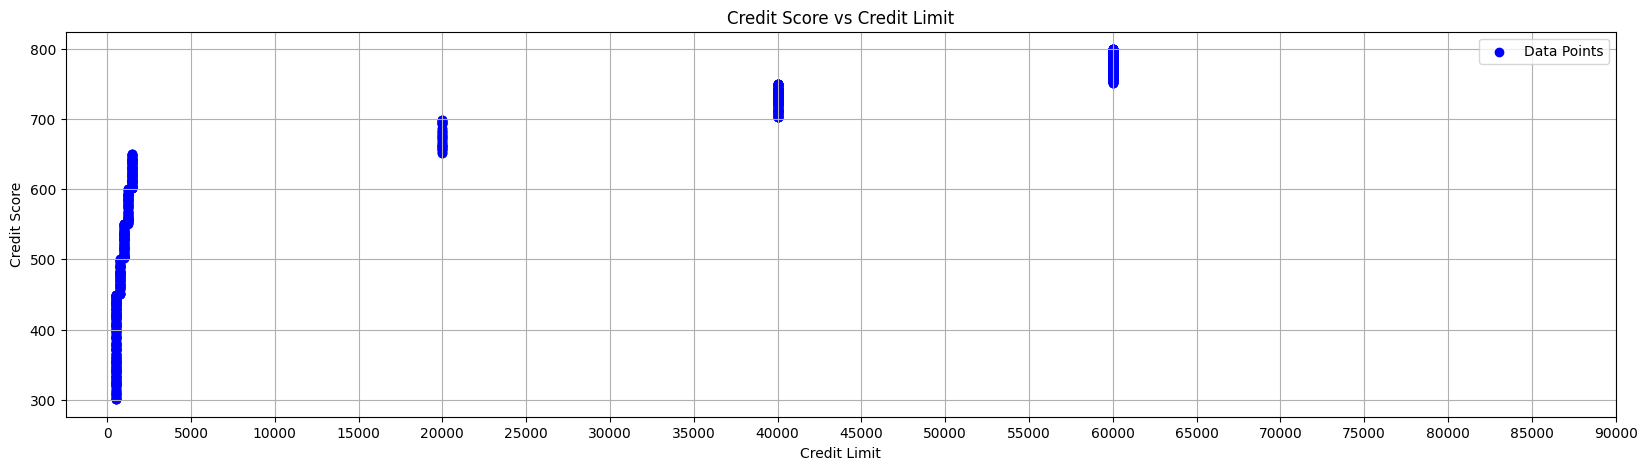

In [57]:
plt.figure(figsize=(20,5))
plt.scatter(df_cs_clean_1.credit_limit,df_cs_clean_1.credit_score,c="blue",label="Data Points")
plt.title("Credit Score vs Credit Limit")
plt.xticks(range(0,90001,5000))
plt.grid(True)
plt.legend()
plt.xlabel("Credit Limit")
plt.ylabel("Credit Score")
plt.show()

In [58]:
bin_ranges=[300,450,500,550,600,650,700,750,800] #This is for range e.g 300 to 450, 450 to 500 etc
bin_label= [f'{start}-{end-1}'for start, end in zip(bin_ranges,bin_ranges[1:])] #we can also do it manually like [350-450,450-500...] we took from chatgpt
df_cs_clean_1['credit_score_range']=pd.cut(df_cs_clean_1['credit_score'],bins=bin_ranges,labels=bin_label,include_lowest=True,right=False)

<ipython-input-58-c6e78ec1c600>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean_1['credit_score_range']=pd.cut(df_cs_clean_1['credit_score'],bins=bin_ranges,labels=bin_label,include_lowest=True,right=False)


In [59]:
df_cs_clean_1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [60]:
df_cs_clean_1[df_cs_clean_1["credit_score_range"]=="700-749"]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
6,7,747,0.523965,15544.0,4.0,40000.0,700-749
16,17,702,0.894423,18444.0,0.0,40000.0,700-749
27,28,729,0.149748,3453.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
969,966,720,0.203742,6159.0,4.0,40000.0,700-749
970,967,739,0.845474,23929.0,4.0,40000.0,700-749
991,988,739,0.435891,9283.0,4.0,40000.0,700-749
994,991,709,0.718484,15473.0,4.0,40000.0,700-749


In [61]:
mode_df=df_cs_clean_1.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index() #there is no mode function available so we use aggregate functon , iloc means it takes first mode value
mode_df

<ipython-input-61-9364c4721287>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df=df_cs_clean_1.groupby("credit_score_range")["credit_limit"].agg(lambda x: x.mode().iloc[0]).reset_index() #there is no mode function available so we use aggregate functon , iloc means it takes first mode value


,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [62]:
df_cs_clean_1[df_cs_clean_1["credit_limit"].isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
761,758,783,0.801201,28920.0,3.0,NaN,750-799
64,65,734,0.473715,13631.0,0.0,NaN,700-749
211,212,337,0.608700,226.0,4.0,NaN,300-449


In [63]:
df_cs_clean_2=pd.merge(df_cs_clean_1,mode_df,on="credit_score_range",suffixes=("","_mode"))
df_cs_clean_2.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
45,330,735,0.690835,14679.0,2.0,40000.0,700-749,40000.0
78,550,720,0.879308,18432.0,0.0,40000.0,700-749,40000.0
756,719,613,0.562543,494.0,0.0,1500.0,600-649,1500.0


In [64]:
df_cs_clean_2[df_cs_clean_2["credit_limit"].isnull()].sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
893,490,766,0.194645,9079.0,1.0,NaN,750-799,60000.0
310,945,526,0.272734,227.0,1.0,NaN,500-549,1000.0
693,115,619,0.128910,151.0,1.0,NaN,600-649,1500.0


In [65]:
#df_cs_clean_3=df_cs_clean_2 if we do like this then it will only take reference of this and can't make a full copy so we use .copy() function
df_cs_clean_3=df_cs_clean_2.copy()

In [66]:
df_cs_clean_3["credit_limit"].fillna(df_cs_clean_3['credit_limit_mode'],inplace=True)
df_cs_clean_3.shape

(1000, 8)

In [67]:
#df_cs_clean_3[df_cs_clean_3["credit_limit"].isnull()].sample(3) It will give error because no null values
df_cs_clean_3.isnull().sum()

,0
cust_id,0
credit_score,0
credit_utilisation,0
outstanding_debt,0
credit_inquiries_last_6_months,0
credit_limit,0
credit_score_range,0
credit_limit_mode,0


In [68]:
df_cs_clean_3.loc[[337,477]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
337,71,303,0.436864,184.0,3.0,500.0,300-449,500.0
477,648,405,0.231599,63.0,0.0,500.0,300-449,500.0


In [69]:
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


<Axes: xlabel='outstanding_debt'>

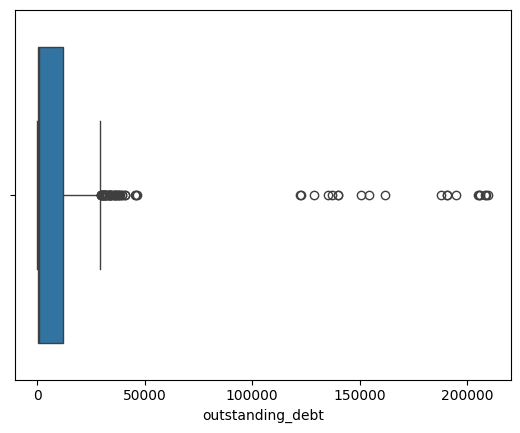

In [70]:
sns.boxplot(x=df_cs_clean_3.outstanding_debt)

In [71]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
35,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
41,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
101,726,737,0.136048,205404.0,4.0,40000.0,700-749,40000.0
142,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
363,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
406,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0
474,637,420,0.323984,140063.0,4.0,500.0,300-449,500.0
604,647,498,0.658087,128818.0,3.0,750.0,450-499,750.0


In [72]:
df_cs_clean_3.loc[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit,'outstanding_debt'] = df_cs_clean_3.credit_limit

In [73]:
df_cs_clean_3.loc[[6,12]]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
6,39,734,0.573023,40000.0,3.0,40000.0,700-749,40000.0
12,94,737,0.739948,40000.0,2.0,40000.0,700-749,40000.0


### **Correlation among Credit Profile Data (Variables)**

In [74]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
2,7,747,0.523965,15544.0,4.0,40000.0,700-749,40000.0
3,17,702,0.894423,18444.0,0.0,40000.0,700-749,40000.0
4,28,729,0.149748,3453.0,2.0,40000.0,700-749,40000.0


In [75]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [76]:
df_merged=df_cust.merge(df_cs_clean_3,on="cust_id",how="inner")
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [77]:
numeric_cols = ['credit_score','credit_utilisation','outstanding_debt','credit_limit','annual_income','age']
correlation_matrix=df_merged[numeric_cols].corr()
correlation_matrix

,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575751,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086368,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555661,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684775,0.510993
annual_income,0.575751,-0.086368,0.555661,0.684775,1.000000,0.619037
age,0.444917,-0.027713,0.444301,0.510993,0.619037,1.000000


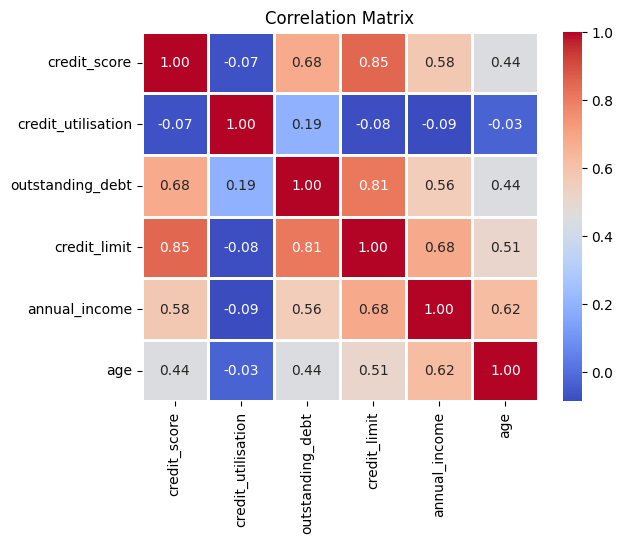

In [78]:
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidth=0.8)
plt.title("Correlation Matrix")
plt.show()

### **Exercise: Handle NULL Values in Transactions Table**

In [79]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [80]:
df_trans.shape

(128037, 7)

In [81]:
df_trans.isnull().sum()

,0
tran_id,0
cust_id,0
tran_date,0
tran_amount,0
platform,1292
product_category,0
payment_type,1


In [82]:
df_trans[df_trans.platform.isnull()].head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe


In [83]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [84]:
df_trans.platform.mode()[0]

'Amazon'

In [85]:
df_trans.platform.value_counts()

,count
platform,
Amazon,38833
Flipkart,31518
Alibaba,18800
Meesho,18674
Shopify,10028
Cred,6336
Ebay,2556


<Axes: xlabel='count', ylabel='product_category'>

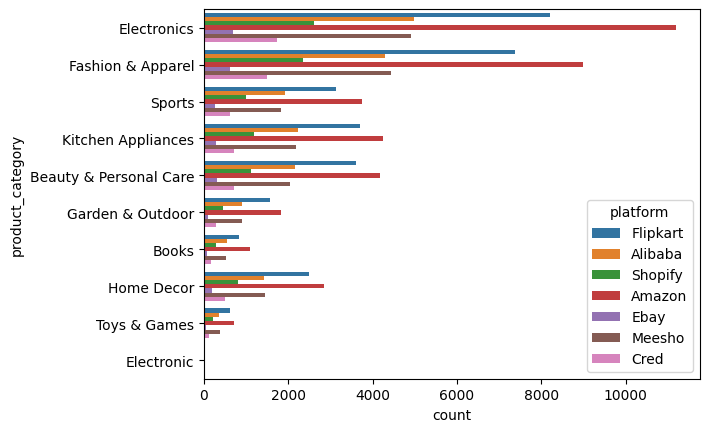

In [86]:
sns.countplot(y="product_category",hue="platform",data=df_trans) #hue is to add new dimension

In [87]:
df_trans.platform.fillna(df_trans.platform.mode()[0],inplace=True)

In [88]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [89]:
df_trans.isnull().sum()

,0
tran_id,0
cust_id,0
tran_date,0
tran_amount,0
platform,0
product_category,0
payment_type,1


### **Data Cleaning: Treat Outliers using IQR (Transaction Amount)**

In [90]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,128037.000000,128037.000000,128037.000000
mean,64019.000000,501.195459,3288.948538
std,36961.242545,288.697463,13238.259016
min,1.000000,1.000000,0.000000
25%,32010.000000,251.000000,64.000000
50%,64019.000000,501.000000,142.000000
75%,96028.000000,752.000000,400.000000
max,128037.000000,1000.000000,69999.000000


In [91]:
df_trans_zero=df_trans[df_trans.tran_amount==0]
df_trans_zero.shape

(1263, 7)

In [92]:
df_trans_zero.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card


In [93]:
df_trans_zero[["platform","product_category","payment_type"]].value_counts()

,,,count
platform,product_category,payment_type,
Amazon,Electronics,Credit Card,1263


In [94]:
df_trans_1=df_trans[(df_trans.platform=="Amazon") & (df_trans.product_category=="Electronics") & (df_trans.payment_type=="Credit Card")]
df_trans_1.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card


In [95]:
median_to_replace=df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

577.0

In [96]:
df_trans['tran_amount'].replace(0,median_to_replace,inplace=True)

In [97]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,128037.000000,128037.000000,128037.000000
mean,64019.000000,501.195459,3294.640260
std,36961.242545,288.697463,13236.967692
min,1.000000,1.000000,2.000000
25%,32010.000000,251.000000,66.000000
50%,64019.000000,501.000000,147.000000
75%,96028.000000,752.000000,418.000000
max,128037.000000,1000.000000,69999.000000


<Axes: xlabel='tran_amount', ylabel='Count'>

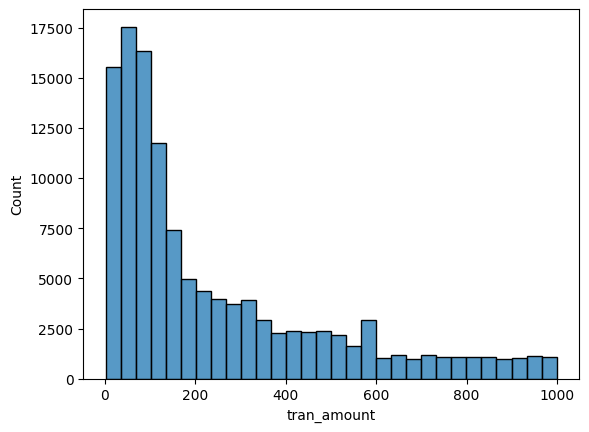

In [98]:
sns.histplot(df_trans[df_trans.tran_amount<10000].tran_amount,bins=30)

# **It's completely Right Skewed so we use IQR [We don't use STD because it is not a normal distribution]**

In [99]:
Q1,Q3 = df_trans['tran_amount'].quantile([0.25,0.75])

IQR = Q3-Q1

lower=Q1-2*IQR
upper=Q3+2*IQR

lower,upper

(-638.0, 1122.0)

In [100]:
df_tran_outliers=df_trans[df_trans.tran_amount>=upper]
df_tran_outliers.shape

(6527, 7)

In [101]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [102]:
tran_mean_per_category=df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

,tran_amount
product_category,
Beauty & Personal Care,91.830761
Books,29.682797
Electronic,835.000000
Electronics,512.065715
Fashion & Apparel,64.404044
Garden & Outdoor,125.892660
Home Decor,302.776193
Kitchen Appliances,176.872090
Sports,270.339150


In [103]:
df_tran_outliers.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card


In [104]:
df_trans.loc[df_tran_outliers.index,'tran_amount'] = df_tran_outliers['product_category'].map(tran_mean_per_category)

<ipython-input-104-ad2eb92bf7af>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 91.83076124  49.76550552 176.87208968 ... 512.06571515  64.40404433
  64.40404433]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trans.loc[df_tran_outliers.index,'tran_amount'] = df_tran_outliers['product_category'].map(tran_mean_per_category)


In [105]:
df_trans.loc[df_tran_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,91.830761,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,49.765506,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.872090,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.404044,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.872090,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
127926,127927,554,2023-03-05,176.872090,Amazon,Kitchen Appliances,Net Banking
127954,127955,890,2023-03-05,64.404044,Flipkart,Fashion & Apparel,Phonepe
128004,128005,218,2023-03-05,512.065715,Amazon,Electronics,Gpay
128013,128014,652,2023-03-05,64.404044,Flipkart,Fashion & Apparel,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

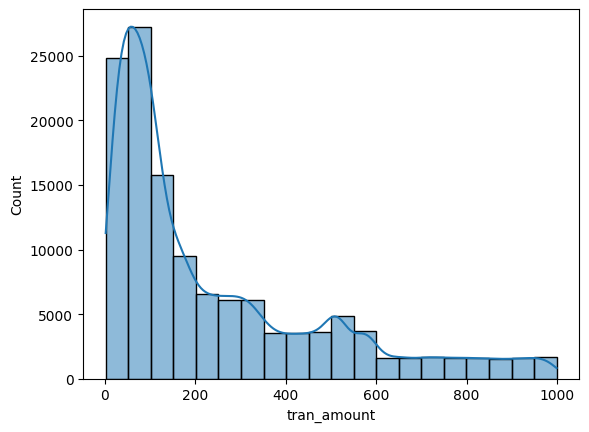

In [106]:
sns.histplot(df_trans.tran_amount,kde=True,bins=20)

### **Data Visualization: Transactions Table**

In [107]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

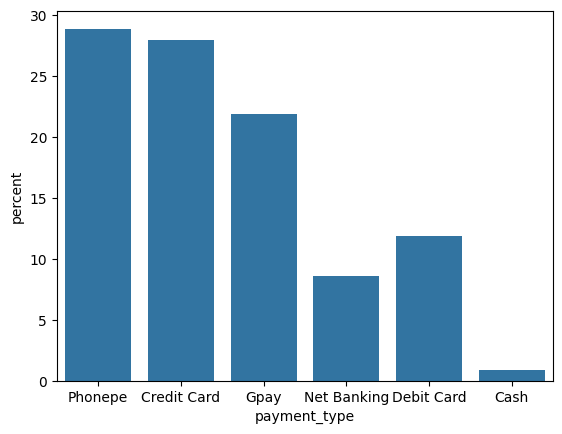

In [108]:
sns.countplot(x=df_trans.payment_type, stat='percent')

In [109]:
df_merged_2=pd.merge(df_merged,df_trans,on="cust_id",how="inner")
print(df_merged_2.shape)
df_merged_2.head()

(128037, 22)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,...,0.0,40000.0,700-749,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card


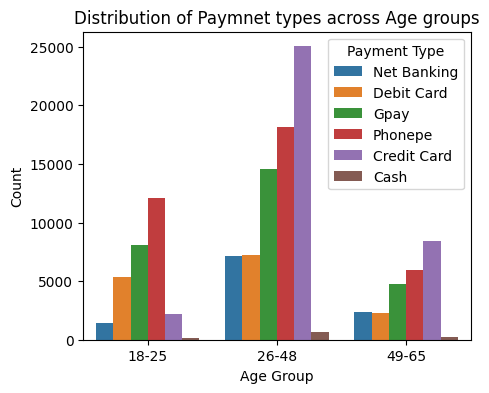

In [110]:
plt.figure(figsize=(5,4))
sns.countplot(x='age_group',hue='payment_type',data=df_merged_2)
plt.title("Distribution of Paymnet types across Age groups")
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type',loc='upper right')
plt.show()

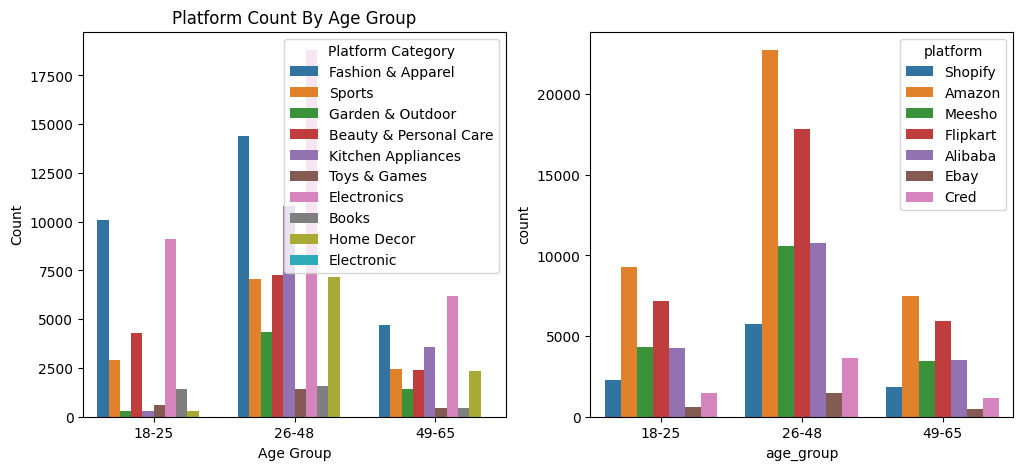

In [111]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
 #rows and columns for subplots(sub graphs in same output)
sns.countplot(x="age_group",hue="product_category",data=df_merged_2,ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category",loc="upper right")

sns.countplot(x="age_group",hue="platform",data=df_merged_2,ax=ax2)
ax1.set_title("Platform Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Platform Category",loc="upper right")

### **Phase-2_Campaign Planning**

## **Bussiness Analysis and launch of AB Testing : Targeting Untapped Market**

**Insights specific to customers with age group of 18 - 25**

1. People with age group of 18-25 accounts to ~25% of customer base in the data
2. Avg annual income of this age group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and max credit limit
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Avg transaction amount made with credit cards is also low compared to other groups
6. Top 3 most used shopping products categories: Electronics, Fashion & Apparel, Beauty & Personal care

### **(1) Pre-Campaign**
We want to do a trial run for our new credit card. For this we need to figure out (1) How many customers do we need for our
A/B testing. We will form a control and test group. For both of these groups we can figure out number of customers we need
based on the statistical power and effect size that we agree upon after discussing with business. We will use

In [113]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [114]:
#to define sample size
alpha = 0.05 #probability of test 1 error to be happen
power = 0.8 #beta statistic power (probabilty of test 2 error to be happen)
effect_size = 0.2 #difference between two mean : control and test group

sms.tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=1,
    alternative='two-sided'
)

393.4056989990335

In [115]:
#calculate the required sample size for different effect sizes
effect_sizes = [0.1,0.2,0.3,0.4,0.5,1] #standard deviation greater than control group
for effect_size in effect_sizes:
    sample_size = sms.tt_ind_solve_power(
        effect_size=effect_size,
        alpha=alpha,
        power=power,
        ratio=1,
        alternative='two-sided'
    )
    print(f"Effect size : {effect_size}, Required Sample Size : {sample_size : .0f} customers")

Effect size : 0.1, Required Sample Size :  1571 customers
Effect size : 0.2, Required Sample Size :  393 customers
Effect size : 0.3, Required Sample Size :  175 customers
Effect size : 0.4, Required Sample Size :  99 customers
Effect size : 0.5, Required Sample Size :  64 customers
Effect size : 1, Required Sample Size :  17 customers


### **(2) Post-Campaign**

In [148]:
df = pd.read_csv('avg_transactions_after_campaign.csv')
df.head()

,campaign_date,control_group_avg_tran,test_group_avg_tran
0,2023-09-10,259.83,277.32
1,2023-09-11,191.27,248.68
2,2023-09-12,212.41,286.61
3,2023-09-13,214.92,214.85
4,2023-09-14,158.55,344.08


In [149]:
df.shape

(62, 3)

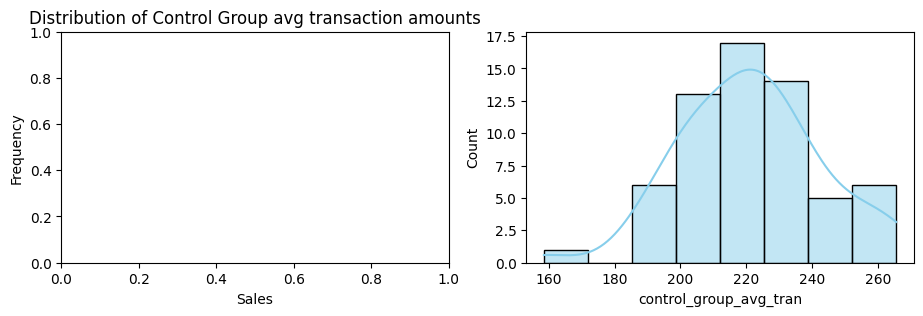

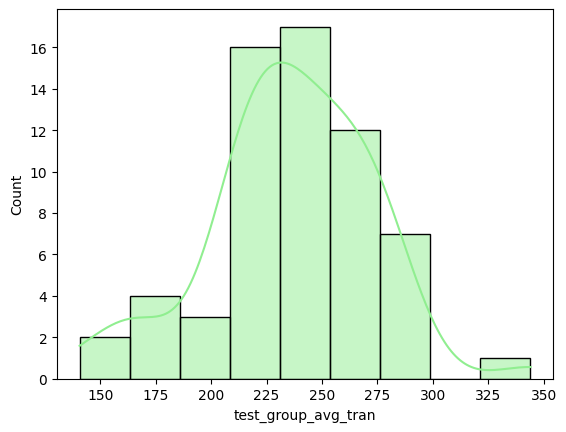

In [154]:
#lets look at distribution of avg transactions amounts in both groups
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(11,3))

sns.histplot(df['control_group_avg_tran'],kde=True,color='skyblue',label='Control group avg transaction')
ax1.set_title('Distribution of Control Group avg transaction amounts')
ax1.set_xlabel('Sales')
ax1.set_ylabel('Frequency')
plt.show()

sns.histplot(df['test_group_avg_tran'],kde=True,color='lightgreen',label='Test group avg transactions')
ax2.set_title('Distribution of Test Group avg transaction amounts')
ax2.set_xlabel('Sales')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.show()

### **Hypothesis Testing**

In [155]:
test_mean=df['test_group_avg_tran'].mean().round(2)
test_std=df['test_group_avg_tran'].std().round(2)
test_mean,test_std

(235.98, 36.66)

In [158]:
control_mean=df['control_group_avg_tran'].mean().round(2)
control_std=df['control_group_avg_tran'].std().round(2)
control_mean,control_std

(221.18, 21.36)

In [159]:
sample_size=df.shape[0]
sample_size

62

In [160]:
a=test_std**2/sample_size
b=control_std**2/sample_size #**2 this means square
z_score=(test_mean-control_mean)/np.sqrt(a+b)
z_score

2.7466072001806734

In [161]:
#For a significance level of 5% (0.05) in a right tailed test, the critical z-value is approximately 1
critical_z_value = st.norm.ppf(1-alpha/2) #Right tailed test at a 5% significance level
critical_z_value

1.959963984540054

In [162]:
z_score > critical_z_value

True

In [163]:
p_value = 1 - st.norm.cdf(z_score)
p_value

0.0030107601919702187

In [164]:
p_value < alpha

True

We reject the null hypothesis and hence our new credit card avg trans is greater than old card trans

In [165]:
#calculate the 95% confidence interval (CI) for the test group
test_group_CI = st.norm.interval(0.95,loc=test_mean,scale=test_std/np.sqrt(sample_size))
test_group_CI


(226.85475135624552, 245.10524864375446)

# **If I release this new credit card on an average people will spending amount of 226 to 245 Dollars**